### Film data statistics

* film budget and revenue data
* film directors vs. financial results
* top box office films and genres
* production countries by number of films and total revenue


In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
np.warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('allFilms1.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres_x,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009.0,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Avatar,False,7.2,12114.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007.0,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015.0,8.806746e+08,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Spectre,False,6.3,4552.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dark Knight Rises,False,7.6,9263.0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,John Carter,False,6.1,2170.0


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres_x', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget_x', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'adult', 'budget_y', 'genres_y',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
data=data[['director_name','director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres_x', 'actor_1_name','cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords','country','content_rating', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'budget_y','revenue', 'title']]

In [8]:
data.shape

(4458, 19)

In [11]:
data[data.duplicated()==True].count()

director_name                97
director_facebook_likes      97
actor_3_facebook_likes       97
actor_2_name                 97
actor_1_facebook_likes       97
genres_x                     97
actor_1_name                 97
cast_total_facebook_likes    97
actor_3_name                 97
plot_keywords                96
country                      97
content_rating               96
title_year                   97
actor_2_facebook_likes       97
imdb_score                   97
movie_facebook_likes         97
budget_y                     97
revenue                      97
title                        97
dtype: int64

In [12]:
data=data.drop_duplicates()

In [13]:
data.shape

(4361, 19)

In [14]:
data.describe()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,budget_y,revenue
count,4361.000000,4351.000000,4358.000000,4361.000000,4361.000000,4357.000000,4361.000000,4361.00000,4.361000e+03,4.361000e+03
mean,742.431094,673.544243,6977.782010,10296.379729,2002.055263,1758.096397,6.458954,7973.01995,3.138520e+07,8.896001e+07
std,2933.393118,1701.282671,15361.548926,18541.953730,12.530053,4202.304117,1.074918,20098.28392,4.187062e+07,1.676487e+08
min,0.000000,0.000000,0.000000,0.000000,1916.000000,0.000000,1.600000,0.00000,0.000000e+00,0.000000e+00
25%,9.000000,152.000000,651.250000,1567.000000,1999.000000,316.000000,5.900000,0.00000,2.000000e+06,0.000000e+00
50%,54.000000,393.000000,1000.000000,3345.000000,2005.000000,626.000000,6.600000,201.00000,1.600000e+07,2.548293e+07
75%,212.000000,652.000000,12000.000000,14638.000000,2010.000000,939.000000,7.200000,5000.00000,4.200000e+07,1.013710e+08
max,23000.000000,23000.000000,640000.000000,656730.000000,2016.000000,137000.000000,9.300000,349000.00000,3.800000e+08,2.787965e+09


__Plotting the film budget vs revenue:__

In [41]:
sns.set(style='whitegrid',context='notebook',rc={'figure.figsize':(11,8)})

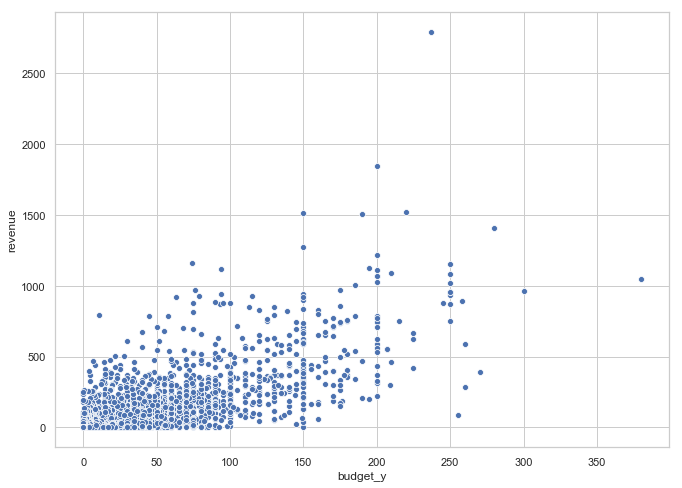

In [16]:
ax=sns.scatterplot(data.budget_y/1000000,data.revenue/1000000) #data in mln USD

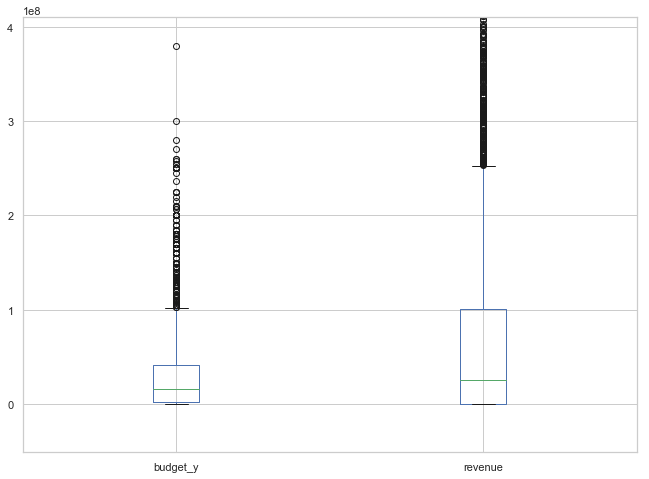

In [17]:
ax=data.boxplot(column=['budget_y', 'revenue'])
ax.set_ylim(-0.51e8,0.41e9)
ax.tick_params(axis='x',labelsize=11)

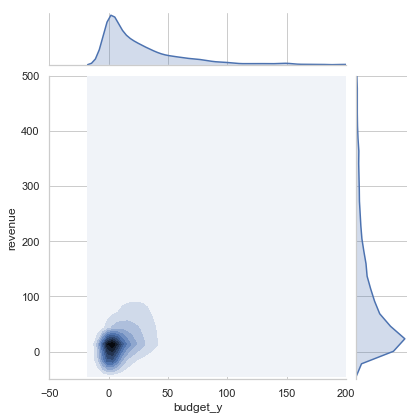

In [51]:
ax=sns.jointplot(x=data.budget_y/1000000,y=data.revenue/1000000,kind= "kde",xlim=(-50,200),ylim=(-50,500))


From the scatterplot, boxplot and jointplot we can see that the vaste majority of films have the budget not higher than 100 mln USD with the median around 25 mln USD and the revenue they achieve is mostly below 250 mln USD. We can notice however that there are many outliers with a higher budget and much higher revenue.

__Top box office films:__

In [18]:
titles=data.groupby(['title','title_year'])['revenue'].max().reset_index()

In [20]:
titles.sample(3)

,title,title_year,revenue
2971,Sunshine Cleaning,2008.0,16174377.0
1417,Haywire,2011.0,33372606.0
2615,Runaway Bride,1999.0,309457509.0


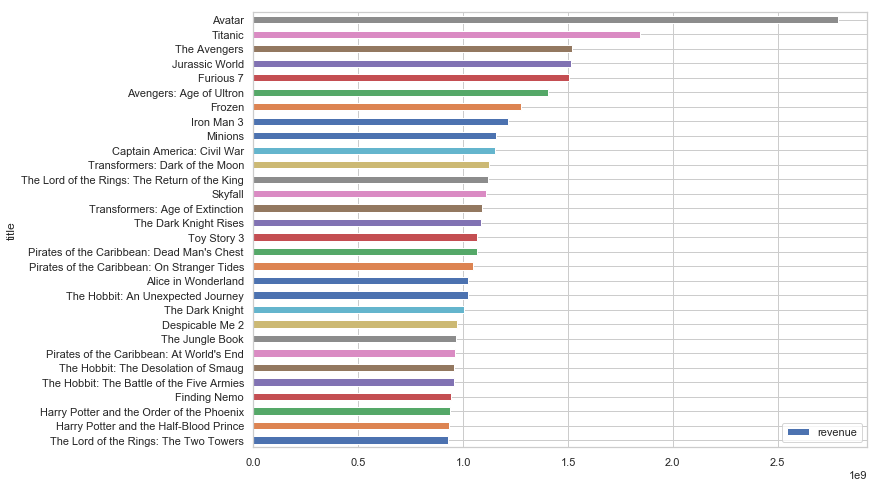

In [21]:
titles.sort_values(by='revenue',ascending=False).head(30)[::-1].plot.barh(x='title',y='revenue')

__Top box office directors:__

In [22]:
directors=data.groupby('director_name')['revenue'].sum().reset_index()

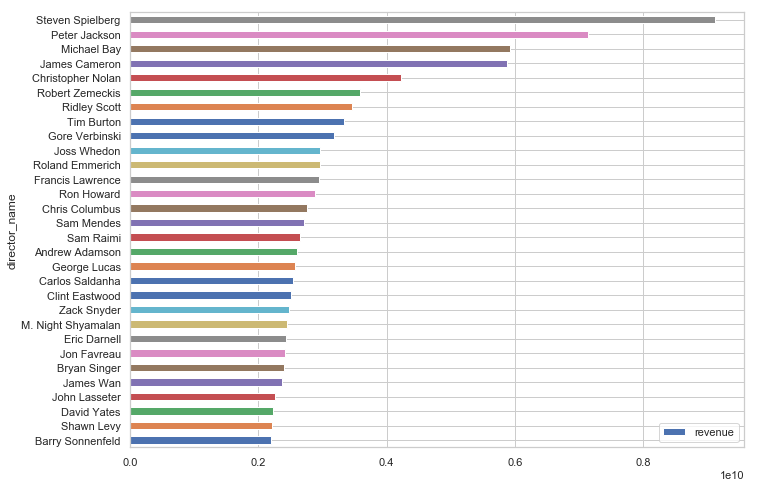

In [23]:
directors.sort_values(by='revenue',ascending=False).head(30)[::-1].plot.barh(x='director_name',y='revenue')

__Top box office genres:__

In [24]:
genres=data.groupby(['genres_x'])['revenue'].sum().reset_index()

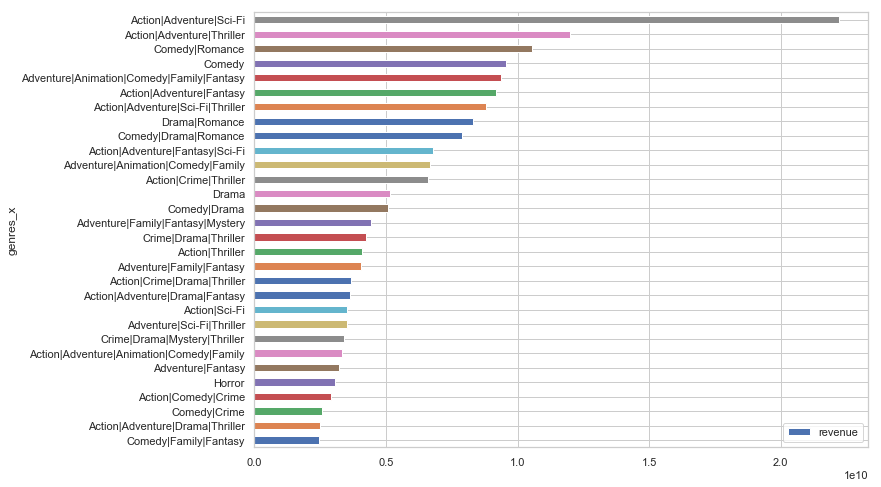

In [25]:
genres.sort_values(by='revenue',ascending=False).head(30)[::-1].plot.barh(x='genres_x',y='revenue')

__Financial results comparison for different directors:__

In [26]:
data['result']=data.revenue/data.budget_y

In [27]:
directors1=data.director_name.value_counts().reset_index()

In [28]:
directors1.columns=['director','films']

In [31]:
directors1=directors1.head(7)
#comparing the 7 directors with the biggest number of films in this particular dataset for the better visibility on the distplot

In [32]:
directors1

,director,films
0,Steven Spielberg,26
1,Woody Allen,21
2,Clint Eastwood,20
3,Martin Scorsese,19
4,Ridley Scott,18
5,Spike Lee,16
6,Steven Soderbergh,15


In [34]:
directors2=directors1.director.tolist()

__Budget scope for different directors:__

In [33]:
sns.set(style='whitegrid',context='notebook',rc={'figure.figsize':(17,8)})

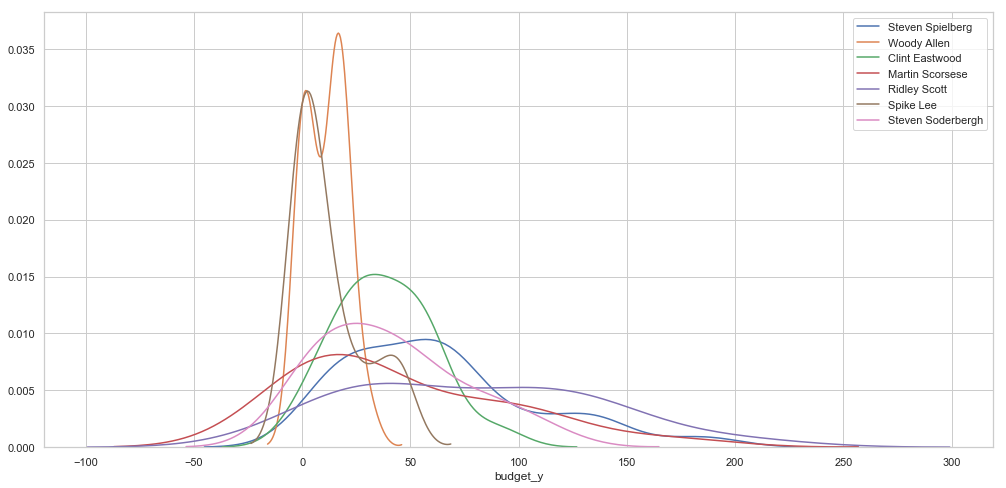

In [35]:
for i in range(len(directors2)):
      ax=sns.distplot(data.budget_y[data.director_name==directors2[i]]/1000000,hist=False,label=directors2[i])

We can see that as far as budget for the films is concerned directors like Woody Allen and Spike Lee have most of their films made on a budget not higher than 50 mln USD or less whereas other directors like Ridley Scott or Steven Spielberg have much wider range of budget amount per film, even up to 300 mln USD.

__Revenue scope for different directors:__

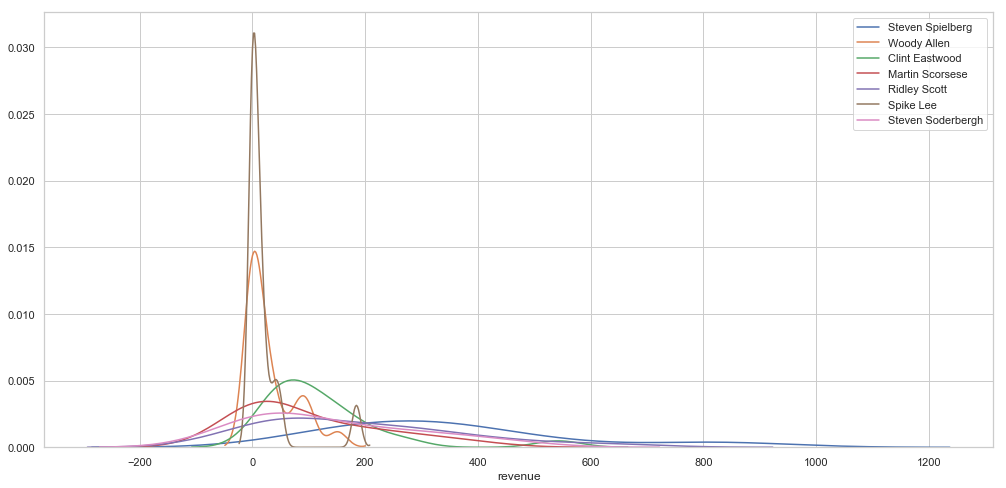

In [36]:
for i in range(len(directors2)):
      ax=sns.distplot(data.revenue[data.director_name==directors2[i]]/1000000,hist=False,label=directors2[i])

As far as revenue is concerned we can see big differences between different directors with Woody Allen and Spike Lee having most of their films achieving revenues below 100 mln USD and directors like Steven Spielberg for whom the film revenue distribution is spread up to over 1 bln USD.

__What about relative financial results?__

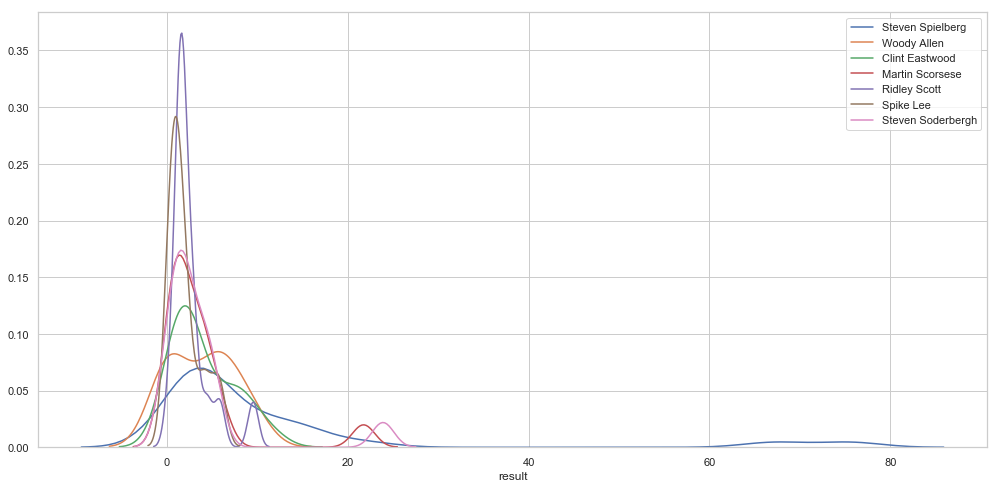

In [37]:
for i in range(len(directors2)):
      ax=sns.distplot(data.result[data.director_name==directors2[i]],hist=False,label=directors2[i])

Comparing the relation between revenue and budget we can see that most of the directors fall in the same bracket: their films revenues are more or less the 10th multiplication of the budget. In this comparison for this particular dataset Ridley Scott has the least positive result: having similar spread of budget values for his films as Steven Spielberg he has much smaller results.

__How are the films received (based on IMDB scores from 1 to 10)?:__

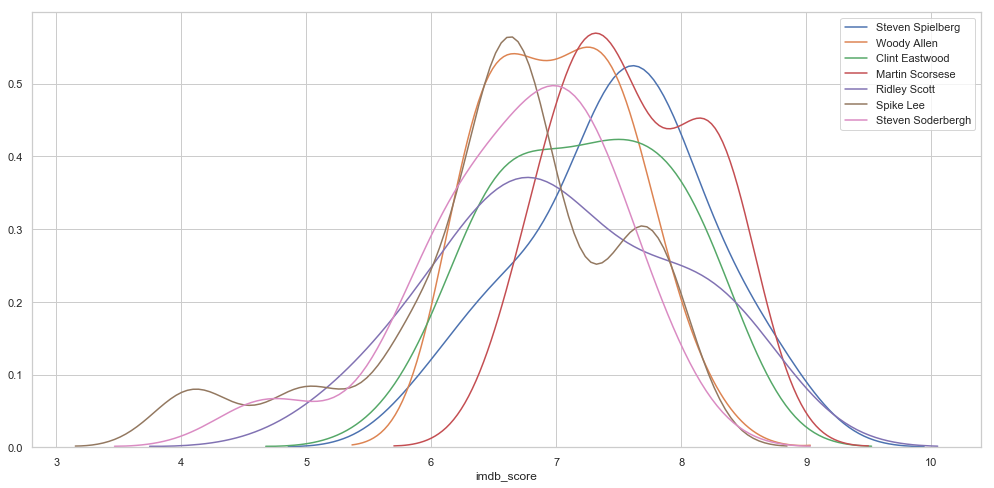

In [38]:
for i in range(len(directors2)):
      ax=sns.distplot(data.imdb_score[data.director_name==directors2[i]],hist=False,label=directors2[i])

All the directors regardless their financial results receive similar scores mostly between 6 and 8 with Steven Spielberg and Martin Scorsese receiving generally higher scores and Spike Lee generally a little bit lower.

__Production countries:__

In [52]:
countries=data.groupby(['country'])['revenue'].count().reset_index()

In [53]:
sns.set(style='whitegrid',context='notebook',rc={'figure.figsize':(8,8)})

In [59]:
labels=countries.sort_values(by='revenue',ascending=False)[:10].country

In [64]:
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

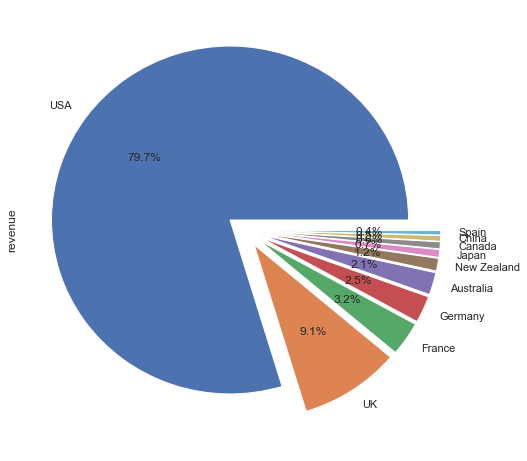

In [66]:
countries.sort_values(by='revenue',ascending=False).head(10)[:10].plot.pie(x='country',y='revenue',explode=explode,\
                                                                       labels=labels,autopct='%1.1f%%',legend=None)

__Production countries by revenue:__

In [61]:
countries_r=data.groupby(['country'])['revenue'].sum().reset_index()

In [62]:
labels=countries_r.sort_values(by='revenue',ascending=False)[:10].country

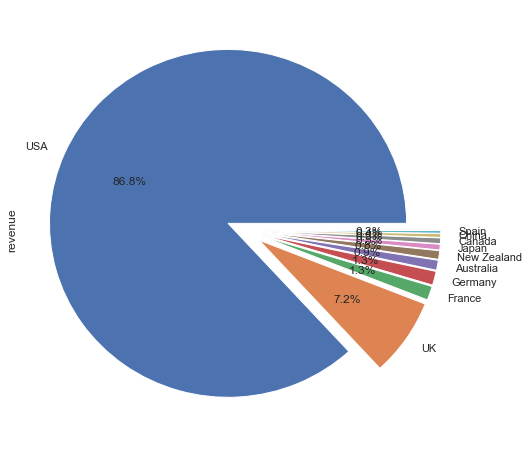

In [67]:
countries_r.sort_values(by='revenue',ascending=False).head(10)[:10].plot.pie(x='country',y='revenue',explode=explode,\
                                                                       labels=labels,autopct='%1.1f%%',legend=None)